# COVID-19 Projection

In [142]:
# library importing
import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
us = pd.read_csv("../data/time_series_covid19_confirmed_US.csv")
gb = pd.read_csv("../data/time_series_covid19_confirmed_global.csv")

In [144]:
print(us.shape)
print(gb.shape)

(3340, 326)
(271, 319)


In [145]:
print(us.columns[:10])
us.head()

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_'],
      dtype='object')


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2617,2634,2661,2686,2704,2716,2735,2751,2780,2818
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,8199,8269,8376,8473,8576,8603,8733,8820,8890,9051
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1160,1161,1167,1170,1170,1171,1173,1175,1178,1189
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1136,1142,1157,1162,1170,1173,1179,1188,1196,1204
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2754,2763,2822,2855,2879,2888,2922,2946,2997,3061


In [146]:
print(gb.columns[:10])
gb.head()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20'],
      dtype='object')


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,44706,44988,45280,45490,45716,45839,45966,46215,46498,46717
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251


In [147]:
def create_time_series(df, index):
    ts = pd.DataFrame()

    date_index = 4
    if df.shape[1] == 326:
        date_index = 11

    dates = pd.Series(df.columns[date_index:])
    values = np.array(df.iloc[index, date_index:], dtype=int)
    ts["dates"] = dates
    ts["values"] = values
    ts = ts.set_index("dates")
    return ts
us_ts = create_time_series(us, 4)
us_ts[-10:]

,values
dates,
11/22/20,2754
11/23/20,2763
11/24/20,2822
11/25/20,2855
11/26/20,2879
11/27/20,2888
11/28/20,2922
11/29/20,2946
11/30/20,2997


In [148]:
print(us["Country_Region"].unique())
print("\n", us["Province_State"].unique())
print("\nNumber of States =", us["Province_State"].unique().shape[0])

['US']

 ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']

Number of States = 58


In [149]:
print(gb["Country/Region"].unique())

print("\nNumber of Countries =", gb["Country/Region"].unique().shape[0])

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jo

In [150]:
def get_index(df, name):
    col = "Country/Region"
    if df.shape[1] == 326:
        col = "Province_State"
    return df[df[col] == name].iloc[0].name

In [151]:
print("Mississippi Index =", get_index(us, "Mississippi"))
print("US Index =", get_index(gb, "US"))

Mississippi Index = 1456
US Index = 246


In [152]:
sweden_index = get_index(gb, "Sweden")
sweden = create_time_series(gb, sweden_index)
sweden.head()

,values
dates,
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


(315,)


Text(0.5, 0, 'Dates')

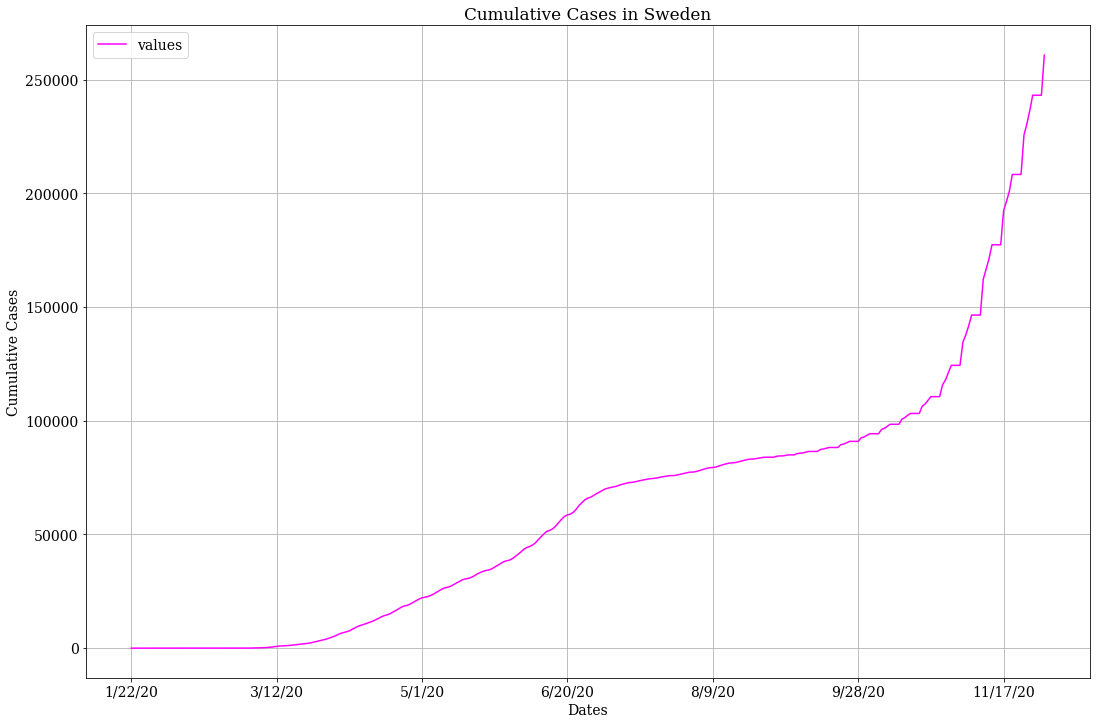

In [153]:
print(sweden["values"].shape)
sweden.plot(figsize=(18, 12), color="magenta")
font = {'font.family' : 'serif',
        'font.size'   : 14,
        'font.weight' : 'normal'}
plt.title("Cumulative Cases in Sweden")
plt.grid(True)
plt.rcParams.update(font)
plt.ylabel("Cumulative Cases")
plt.xlabel("Dates")

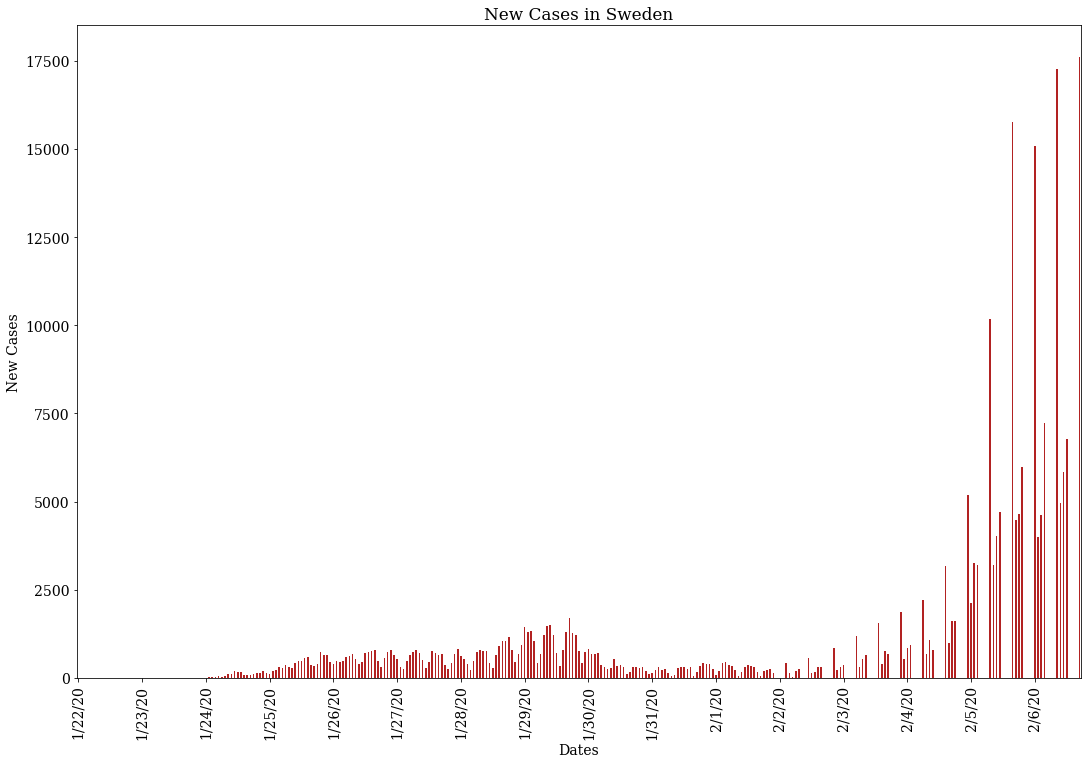

In [154]:
ax = sweden.diff(axis=0).plot(kind='bar', figsize=(18, 12), color="firebrick")
font = {'font.family' : 'serif',
        'font.size'   : 14,
        'font.weight' : 'normal'}
plt.title("New Cases in Sweden")
plt.rcParams.update(font)
ax.get_legend().remove()
plt.ylabel("New Cases")
plt.xlabel("Dates")
ax.set_xticks(np.arange(0, sweden.shape[0], 20))

In [155]:
gb.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,44706,44988,45280,45490,45716,45839,45966,46215,46498,46717
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251


In [156]:
print(gb[gb["Country/Region"] == "Canada"]["Province/State"])

39                      Alberta
40             British Columbia
41             Diamond Princess
42               Grand Princess
43                     Manitoba
44                New Brunswick
45    Newfoundland and Labrador
46        Northwest Territories
47                  Nova Scotia
48                      Nunavut
49                      Ontario
50         Prince Edward Island
51                       Quebec
52       Repatriated Travellers
53                 Saskatchewan
54                        Yukon
Name: Province/State, dtype: object


# COVID-19 Analysis
## British Columbia
I was born and raised in Vancouver, BC. My entire family currently resides in BC. As such, I will restrict my analysis to the impact of COVID-19 on the province of British Columbia. Prior to breaking into an analysis of BC, I will begin by illustrating the impact of COVID-19 on Canada as a whole. 

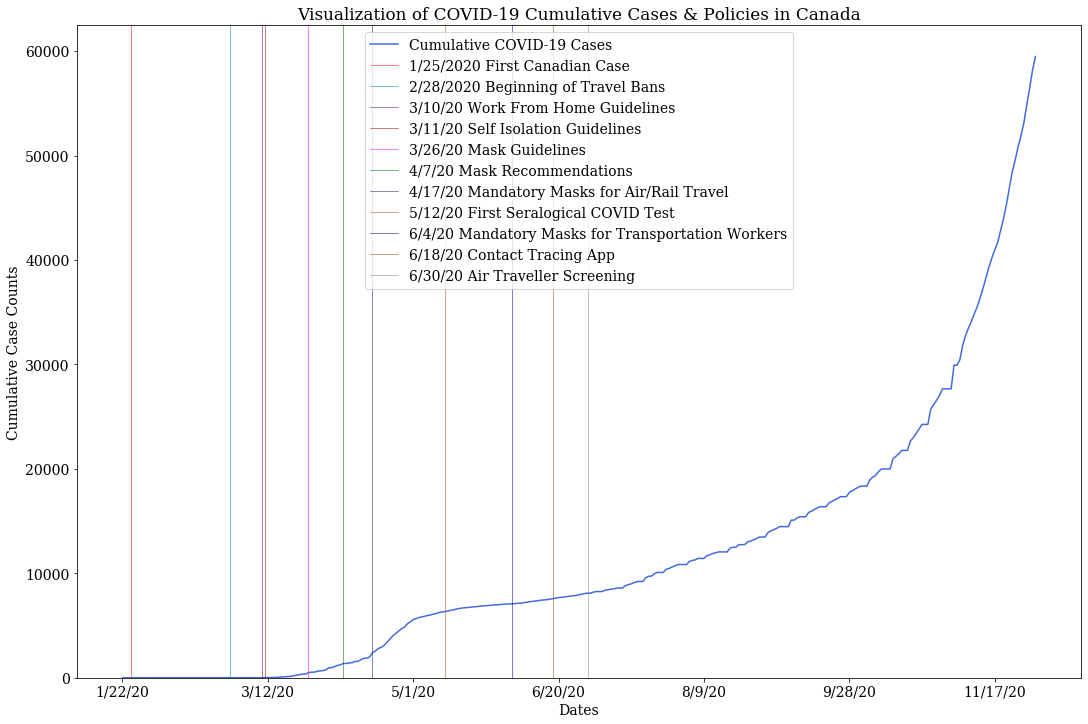

In [157]:
canada = create_time_series(gb, get_index(gb, "Canada"))
ax = canada.plot(figsize=(18, 12), color="royalblue")
font = {'font.family' : 'serif',
        'font.size'   : 14,
        'font.weight' : 'normal'}

plt.rcParams.update(font)
plt.title("Visualization of COVID-19 Cumulative Cases & Policies in Canada")
plt.xlabel("Dates")
plt.ylabel("Cumulative Case Counts")
plt.ylim(bottom=0)
plt.legend()
plt.grid(False)

# Critical Events: https://www.canadianhealthcarenetwork.ca/covid-19-a-canadian-timeline, https://www.cihi.ca/en/covid-19-intervention-timeline-in-canada 
canada = canada.reset_index()
# First case of COVID-19 in Canada
fc_date = "1/25/20"
fc_line = ax.axvline(x=canada[canada["dates"] == fc_date].index[0], color="red", linewidth=0.5)

# Beginning of Travel Bans
tb_date = "2/28/20"
tb_line = ax.axvline(x=canada[canada["dates"] == tb_date].index[0], color="darkcyan", linewidth=0.5)

# Work from home policies
wfh_date = "3/10/20"
wfh_line = ax.axvline(x=canada[canada["dates"] == wfh_date].index[0], color="indigo", linewidth=0.5)

# Self isolation guidelines
si_date = "3/11/20"
si_line = ax.axvline(x=canada[canada["dates"] == si_date].index[0], color="darkred", linewidth=0.5)

# Mask guidelines
mg_date = "3/26/20"
mg_line = ax.axvline(x=canada[canada["dates"] == mg_date].index[0], color="magenta", linewidth=0.5)

# Mask recommendation
mr_date = "4/7/20"
mr_line = ax.axvline(x=canada[canada["dates"] == mr_date].index[0], color="darkgreen", linewidth=0.5)

# Mandatory masks for air travel
mma_date = "4/17/20"
mma_line = ax.axvline(x=canada[canada["dates"] == mma_date].index[0], color="midnightblue", linewidth=0.5)

# First serological COVID test
st_date = "5/12/20"
st_line = ax.axvline(x=canada[canada["dates"] == st_date].index[0], color="sienna", linewidth=0.5)

# Mandatory masks for transportation sector workers
mmt_date = "6/4/20"
mmt_line = ax.axvline(x=canada[canada["dates"] == mmt_date].index[0], color="darkblue", linewidth=0.5)

# National contact tracing app
nct_date = "6/18/20"
nct_line = ax.axvline(x=canada[canada["dates"] == nct_date].index[0], color="saddlebrown", linewidth=0.5)

# Air traveller screening
ats_date = "6/30/20"
ats_line = ax.axvline(x=canada[canada["dates"] == ats_date].index[0], color="slategray", linewidth=0.5)

plt.legend(["Cumulative COVID-19 Cases", "1/25/2020 First Canadian Case", "2/28/2020 Beginning of Travel Bans", "3/10/20 Work From Home Guidelines", "3/11/20 Self Isolation Guidelines", "3/26/20 Mask Guidelines", "4/7/20 Mask Recommendations", "4/17/20 Mandatory Masks for Air/Rail Travel", "5/12/20 First Seralogical COVID Test", "6/4/20 Mandatory Masks for Transportation Workers", "6/18/20 Contact Tracing App", "6/30/20 Air Traveller Screening"])

plt.show()

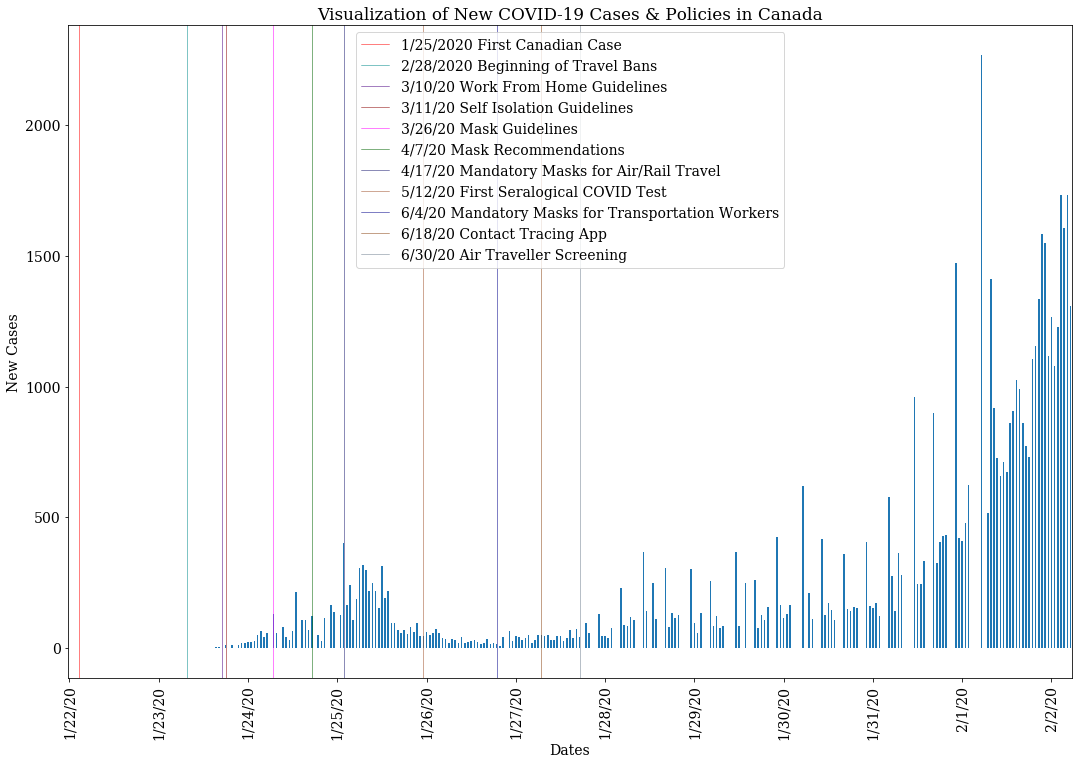

In [158]:
canada = create_time_series(gb, get_index(gb, "Canada"))
ax = canada.diff(axis=0).plot(kind="bar", figsize=(18, 12))
font = {'font.family' : 'serif',
        'font.size'   : 14,
        'font.weight' : 'normal'}

plt.rcParams.update(font)
plt.title("Visualization of New COVID-19 Cases & Policies in Canada")
plt.xlabel("Dates")
plt.ylabel("New Cases")
plt.legend()
ax.set_xticks(np.arange(0, canada.shape[0], 28))
plt.grid(False)

canada = canada.reset_index()

# First case of COVID-19 in Canada
fc_date = "1/25/20"
fc_line = ax.axvline(x=canada[canada["dates"] == fc_date].index[0], color="red", linewidth=0.5)

# Beginning of Travel Bans
tb_date = "2/28/20"
tb_line = ax.axvline(x=canada[canada["dates"] == tb_date].index[0], color="darkcyan", linewidth=0.5)

# Work from home policies
wfh_date = "3/10/20"
wfh_line = ax.axvline(x=canada[canada["dates"] == wfh_date].index[0], color="indigo", linewidth=0.5)

# Self isolation guidelines
si_date = "3/11/20"
si_line = ax.axvline(x=canada[canada["dates"] == si_date].index[0], color="darkred", linewidth=0.5)

# Mask guidelines
mg_date = "3/26/20"
mg_line = ax.axvline(x=canada[canada["dates"] == mg_date].index[0], color="magenta", linewidth=0.5)

# Mask recommendation
mr_date = "4/7/20"
mr_line = ax.axvline(x=canada[canada["dates"] == mr_date].index[0], color="darkgreen", linewidth=0.5)

# Mandatory masks for air travel
mma_date = "4/17/20"
mma_line = ax.axvline(x=canada[canada["dates"] == mma_date].index[0], color="midnightblue", linewidth=0.5)

# First serological COVID test
st_date = "5/12/20"
st_line = ax.axvline(x=canada[canada["dates"] == st_date].index[0], color="sienna", linewidth=0.5)

# Mandatory masks for transportation sector workers
mmt_date = "6/4/20"
mmt_line = ax.axvline(x=canada[canada["dates"] == mmt_date].index[0], color="darkblue", linewidth=0.5)

# National contact tracing app
nct_date = "6/18/20"
nct_line = ax.axvline(x=canada[canada["dates"] == nct_date].index[0], color="saddlebrown", linewidth=0.5)

# Air traveller screening
ats_date = "6/30/20"
ats_line = ax.axvline(x=canada[canada["dates"] == ats_date].index[0], color="slategray", linewidth=0.5)

plt.legend(["1/25/2020 First Canadian Case", "2/28/2020 Beginning of Travel Bans", "3/10/20 Work From Home Guidelines", "3/11/20 Self Isolation Guidelines", "3/26/20 Mask Guidelines", "4/7/20 Mask Recommendations", "4/17/20 Mandatory Masks for Air/Rail Travel", "5/12/20 First Seralogical COVID Test", "6/4/20 Mandatory Masks for Transportation Workers", "6/18/20 Contact Tracing App", "6/30/20 Air Traveller Screening"])

plt.show()

From the above plots, we can see that the measures implemented accross Canada in April and May flattened the curve. Unforunately, these measures only temporarily slowed the spread down. By observing the above Figures, we notice that the number of infected persons is increasing exponentially. 

Since we are restricting our analysis to BC, we will now fit a model to the time-series data. Our visualizations depend on the model that we wish to implement. We will attempt to fit an SIR model to the BC time series data. Prior to doing so, we will explain the specifics of the SIR model so that we can obtain a good understanding as to the information we need to create one. 

# SIR Modelling
## SIR Model Explained
There are three variables that the SIR model depends on, $S$, $I$, and $R$. $S(t)$ is the number of susceptible individuals, $I(t)$ is the number of infected individuals, and $R(t)$ is the number of recovered individuals. We define the following variables to make our future calculations more simple:

$s(t) = \frac{S(t)}{N}$  
$i(t) = \frac{I(t)}{N}$  
$r(t) = \frac{R(t)}{N}$

### Model Assumptions
- The total number of individuals in the population, $N$, is constant
- Individuals do not immigrate to or from the population in question
- There are no births
- There is no loss of immunity (we could assume a loss of immunity and derive different equations)


Since the total number of individuals in the population, $N$, is constant $s(t) + i(t) + r(t) = 1$ because $S(t) + I(t) + R(t) = N$. Given our assumptions, we are effectively assuming that the only way an individual leaves the susceptible group is by becoming infected. Thus, the number of susceptible individuals is always decreasing. 

$\frac{dS}{dt} = -b s(t) I(t) \implies \frac{ds}{dt} = \frac{-b s(t) I(t)}{N}$  

$\frac{ds}{dt} = -b s(t) i(t)$

The $i(t)$ factor is present because given our assumption, if there is just one infected person then the number of susceptible people decreases by a factor of $b s(t)$. Therefore, if there are 2 infected people, then the number of susceptible people decreases by a factor of $2b s(t)$. For $I(t)$ infected people, the number of susceptible people decreases by a factor of $b \hspace{0.5mm} s(t) I(t)$. 

$\frac{dR}{dt} = k I(t) \implies \frac{dr}{dt} = k i(t)$

This follows from the fact that $k$ infected individuals recover every day. Now, since the number of infected people increases as a function of $b \hspace{0.5mm} s(t) I(t)$ and $k \hspace{0.5mm} I(t)$, we have the following:

$\frac{dI}{dt} = -k I(t) + b s(t) I(t) \implies \frac{dI}{dt} = -\frac{dR}{dt} - \frac{dS}{dt} \implies \frac{ds}{dt} + \frac{di}{dt} + \frac{dr}{dt} = 0$

### Initial Conditions
To solve this set of differential equations, we need to supply some initial conditions. We assume that a tiny fraction of our population is infected and the rest of our population is healthy. Thus, for a population of size 5,000,000, we have the following:

$S(0) = 4,999,990$
$I(0) = 10$
$R(0) = 0$

$s(0) = 0.999998 \approx 1$
$i(0) = 2 x 10^{-6}$
$r(0) = 0$

### Euler's Method
We do not numerically solve the SIR equations. Instead, we use Euler's method. For a single time dependent variable, $x$, Euler's method is as follows:

$x_i = x_{i-1} + \frac{dx(t-1)}{dt} \cdot \Delta t$

\noindent
Since we have three variables in the context of the SIR model, we have three Euler formulas:

$s_i = s_{i-1} + \frac{ds}{dt}\Bigr|_{i-1} \cdot \Delta t$
$i_i = i_{i-1} + \frac{di}{dt}\Bigr|_{i-1}  \cdot \Delta t$
$r_i = r_{i-1} + \frac{dr}{dt}\Bigr|_{i-1}  \cdot \Delta t$

Given the SIR differential equations, we have:

$s_i = s_{i-1} - b \hspace{0.5mm} s_{i-1} i_{i-1} \cdot \Delta t$
$i_i = i_{i-1} + (- k i_{i-1} + b \hspace{0.5mm} s_{i-1} i_{i-1}) \cdot \Delta t$
$r_i = r_{i-1} + k \hspace{0.5mm} i_{i-1} \cdot \Delta t$

### Finding Optimal Parameters for a Dataset
There are a few ways to go about this. The first way is to estimate $b$ and $k$ based on the recovery rate and $R$ value typically associated with an SIR outbreak. The other way, which is far more involved, is to define a loss function between the predictions of the model and the data. Then, compute the sum of that loss function over all of the observations. This method gives us a way to quantify the difference between our model's predictions and the data. Using this method, we can then perform a grid search over all of the possible parameters to obtain the optimal model. 

## SIR Model in Practice
To implement the model, we require a few things. We need the number of people that are infected and the number of people that have recovered. Using this information and our assumptions, we can determine how many people are susceptible. We also need to know the factors $b$ and $k$ which characterize how many susceptible persons one infected person transfers the virus to and how quickly an infected person recovers, respectively. To obtain these parameters, we will first make a reasonable guess. Then, we will perform grid search around the parameters close to our guess.

Prior to doing any of this, we need to extract the relevant data from the online sources.

In [159]:
# cumulative BC case counts from provided data 
bc = gb[gb["Province/State"] == "British Columbia"].iloc[:, 4:].transpose()
bc.rename(columns={40:"values"}, inplace=True)
bc.head()

,values
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [160]:
# extracting recovered persons data from https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
gb_rec = pd.read_csv("../data/time_series_covid19_recovered_global.csv")
gb_rec.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37218,37260,37260,37393,37685,37879,37920,38032,38099,38141
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,19912,20484,20974,21286,21617,22180,22527,23072,23609,24136
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,54990,55538,56079,56617,57146,57648,58146,58146,59135,59590
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5988,6066,6130,6171,6238,6293,6367,6452,6505,6598
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,8139,8244,8299,8335,8338,8353,8470,8579,8679,8798


In [161]:
# provided dataset does not include any information about BC
gb_rec[gb_rec["Country/Region"] == "Canada"].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20
39,NaN,Canada,56.1304,-106.3468,0,0,0,0,0,0,...,314529,319250,324802,329676,334375,344034,349629,355401,361020,367837


In [162]:
# examining online BC datasets: http://www.bccdc.ca/health-info/diseases-conditions/covid-19/data
bc_db = pd.read_csv("../data/bc/BCCDC_COVID19_Dashboard_Case_Details.csv")
print(bc_db.shape)
print(bc_db.head())
print(bc_db.tail())

(40797, 5)
  Reported_Date                 HA Sex Age_Group Classification_Reported
0    2020-01-26      Out of Canada   M     40-49           Lab-diagnosed
1    2020-02-02  Vancouver Coastal   F     50-59           Lab-diagnosed
2    2020-02-05      Out of Canada   F     20-29           Lab-diagnosed
3    2020-02-05      Out of Canada   M     30-39           Lab-diagnosed
4    2020-02-11           Interior   F     30-39           Lab-diagnosed
      Reported_Date                 HA Sex Age_Group Classification_Reported
40792    2020-12-11  Vancouver Coastal   U   Unknown           Lab-diagnosed
40793    2020-12-11  Vancouver Coastal   U   Unknown           Lab-diagnosed
40794    2020-12-11  Vancouver Coastal   U   Unknown           Lab-diagnosed
40795    2020-12-11  Vancouver Coastal   U   Unknown           Lab-diagnosed
40796    2020-12-11  Vancouver Coastal   F     30-39           Lab-diagnosed


This dataset tracks when each individual was diagnosed with COVID, where the diagnosis took place, and some other properties of the diagnosis that may be useful. 

In [163]:
print(bc_db.Classification_Reported.unique())

['Lab-diagnosed' 'Epi-linked']


In [164]:
bc_db_lab = pd.read_csv("../data/bc/BCCDC_COVID19_Dashboard_Lab_Information.csv")
print(bc_db_lab.shape)
print(bc_db_lab.head())
print(bc_db_lab.tail())

(2254, 6)
         Date    Region  New_Tests  Total_Tests  Positivity  Turn_Around
0  2020-01-23        BC          2            2         0.0         32.0
1  2020-01-23    Fraser          0            0         0.0          0.0
2  2020-01-23  Interior          0            0         0.0          0.0
3  2020-01-23  Northern          0            0         0.0          0.0
4  2020-01-23   Unknown          0            0         0.0          0.0
            Date             Region  New_Tests  Total_Tests  Positivity  \
2249  2020-12-10           Interior       1335       130668        6.61   
2250  2020-12-10           Northern        379        37621       10.34   
2251  2020-12-10            Unknown         68        25639        0.00   
2252  2020-12-10  Vancouver Coastal       2543       400235        4.44   
2253  2020-12-10   Vancouver Island       1150       143159        0.99   

      Turn_Around  
2249         23.9  
2250         28.4  
2251         53.1  
2252         21.8  
2

In [165]:
print(bc_db_lab.columns)
print(bc_db_lab[bc_db_lab["Date"] == "2020-01-23"][["Date", "Region", "New_Tests", "Total_Tests", "Positivity"]], "\n")

print(bc_db_lab[bc_db_lab["Date"] == "2020-01-25"][["Date", "Region", "New_Tests", "Total_Tests", "Positivity"]], "\n")

print(bc_db_lab[bc_db_lab["Date"] == "2020-01-26"][["Date", "Region", "New_Tests", "Total_Tests", "Positivity"]], "\n")

print(bc_db_lab[bc_db_lab["Date"] == "2020-01-27"][["Date", "Region", "New_Tests", "Total_Tests", "Positivity"]], "\n")

print(bc_db_lab[bc_db_lab["Date"] == "2020-01-28"][["Date", "Region", "New_Tests", "Total_Tests", "Positivity"]], "\n")

print(bc_db_lab[bc_db_lab["Date"] == "2020-05-28"][["Date", "Region", "New_Tests", "Total_Tests", "Positivity"]], "\n")

Index(['Date', 'Region', 'New_Tests', 'Total_Tests', 'Positivity',
       'Turn_Around'],
      dtype='object')
         Date             Region  New_Tests  Total_Tests  Positivity
0  2020-01-23                 BC          2            2         0.0
1  2020-01-23             Fraser          0            0         0.0
2  2020-01-23           Interior          0            0         0.0
3  2020-01-23           Northern          0            0         0.0
4  2020-01-23            Unknown          0            0         0.0
5  2020-01-23  Vancouver Coastal          2            2         0.0
6  2020-01-23   Vancouver Island          0            0         0.0 

          Date             Region  New_Tests  Total_Tests  Positivity
7   2020-01-25                 BC          4            6         0.0
8   2020-01-25             Fraser          3            3         0.0
9   2020-01-25           Interior          0            0         0.0
10  2020-01-25           Northern          0          

This dataset includes the number of COVID tests conducted in every region in BC almost every day. It also shows how many of those tests were positive. Currently, we have precise data with respect to the number of infected. We do not, however, have any information about the number of recovered persons. 

In [166]:
bc_rs = pd.read_csv("../data/bc/BCCDC_COVID19_Regional_Summary_Data.csv")
print(bc_rs.shape)
print(bc_rs.head())
print(bc_rs.tail())

(8346, 6)
         Date Province      HA          HSDA  Cases_Reported  \
0  2020-01-26       BC     All           All               0   
1  2020-01-26       BC  Fraser           All               0   
2  2020-01-26       BC  Fraser   Fraser East               0   
3  2020-01-26       BC  Fraser  Fraser North               0   
4  2020-01-26       BC  Fraser  Fraser South               0   

   Cases_Reported_Smoothed  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  
            Date       Province                HA                      HSDA  \
8341  2020-12-11             BC  Vancouver Island  Central Vancouver Island   
8342  2020-12-11             BC  Vancouver Island    North Vancouver Island   
8343  2020-12-11             BC  Vancouver Island    South Vancouver Island   
8344  2020-12-11             BC  Vancouver Island                   Unknown   
8345  2020-12-11  Out of Canada     

This dataset provides summary data for the information included in the other datasets. As such, we must try another source for the data. 

In [167]:
# new data: https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html
ca_19 = pd.read_csv("../data/bc/covid19-download.csv")
print(ca_19.shape)
print(ca_19.head())

print(ca_19.tail())

(4197, 35)
   pruid            prname              prnameFR        date  numconf  \
0     35           Ontario               Ontario  2020-01-31        3   
1     59  British Columbia  Colombie-Britannique  2020-01-31        1   
2      1            Canada                Canada  2020-01-31        4   
3     35           Ontario               Ontario  2020-02-08        3   
4     59  British Columbia  Colombie-Britannique  2020-02-08        4   

   numprob  numdeaths  numtotal  numtested  numrecover  ...  numdeaths_last14  \
0        0        0.0         3        NaN         NaN  ...               NaN   
1        0        0.0         1        NaN         NaN  ...               NaN   
2        0        0.0         4        NaN         NaN  ...               NaN   
3        0        0.0         3        NaN         NaN  ...               NaN   
4        0        0.0         4        NaN         NaN  ...               NaN   

   ratedeaths_last14  numtotal_last7  ratetotal_last7  numdeath

In [168]:
print(ca_19.columns)

Index(['pruid', 'prname', 'prnameFR', 'date', 'numconf', 'numprob',
       'numdeaths', 'numtotal', 'numtested', 'numrecover', 'percentrecover',
       'ratetested', 'numtoday', 'percentoday', 'ratetotal', 'ratedeaths',
       'numdeathstoday', 'percentdeath', 'numtestedtoday', 'numrecoveredtoday',
       'percentactive', 'numactive', 'rateactive', 'numtotal_last14',
       'ratetotal_last14', 'numdeaths_last14', 'ratedeaths_last14',
       'numtotal_last7', 'ratetotal_last7', 'numdeaths_last7',
       'ratedeaths_last7', 'avgtotal_last7', 'avgincidence_last7',
       'avgdeaths_last7', 'avgratedeaths_last7'],
      dtype='object')


Eureka! This dataset contains the number of confirmed cases, recovered cases, number of casualties, and many other useful columns. We will use this dataset extensively for our SIR analysis. 

In [169]:
bc_19 = ca_19[ca_19["prname"] == "British Columbia"][['date', 'numconf', 'numprob',
       'numdeaths', 'numtotal', 'numtested', 'numrecover', 'percentrecover',
       'ratetested', 'numtoday', 'percentoday', 'ratetotal', 'ratedeaths',
       'numdeathstoday', 'percentdeath', 'numtestedtoday', 'numrecoveredtoday',
       'percentactive', 'numactive', 'rateactive', 'numtotal_last14',
       'ratetotal_last14', 'numdeaths_last14', 'ratedeaths_last14',
       'numtotal_last7', 'ratetotal_last7', 'numdeaths_last7',
       'ratedeaths_last7', 'avgtotal_last7', 'avgincidence_last7',
       'avgdeaths_last7', 'avgratedeaths_last7']]
bc_19.rename(columns={"numconf": "infected", "numdeaths": "dead", "numrecover": "recovered"}, inplace=True)
essentials = ["date", "infected", "recovered", "dead", "numtotal", "numtested"]
print(bc_19.shape)
print(bc_19[essentials].head(), "\n")
print(bc_19[essentials].tail())

(292, 32)
          date  infected  recovered  dead  numtotal  numtested
1   2020-01-31         1        NaN   0.0         1        NaN
4   2020-02-08         4        NaN   0.0         4        NaN
7   2020-02-16         5        NaN   0.0         5        NaN
10  2020-02-21         6        NaN   0.0         6        NaN
13  2020-02-24         6        NaN   0.0         6        NaN 

            date  infected  recovered   dead  numtotal  numtested
4122  2020-12-07     38152    27287.0  527.0     38152   828968.0
4137  2020-12-08     38718    27897.0  543.0     38718   845737.0
4152  2020-12-09     39337    28448.0  559.0     39337   853460.0
4167  2020-12-10     40060    28948.0  587.0     40060   859644.0
4182  2020-12-11     40797    29598.0  598.0     40797   859644.0


Now, we can design some insightful visuals that will illustrate how the number of infected persons, recovered persons, and passed individuals changed over time in BC. 

In [170]:
bc_19 = bc_19.reset_index()
bc_19_date_indexed = bc_19.set_index("date")

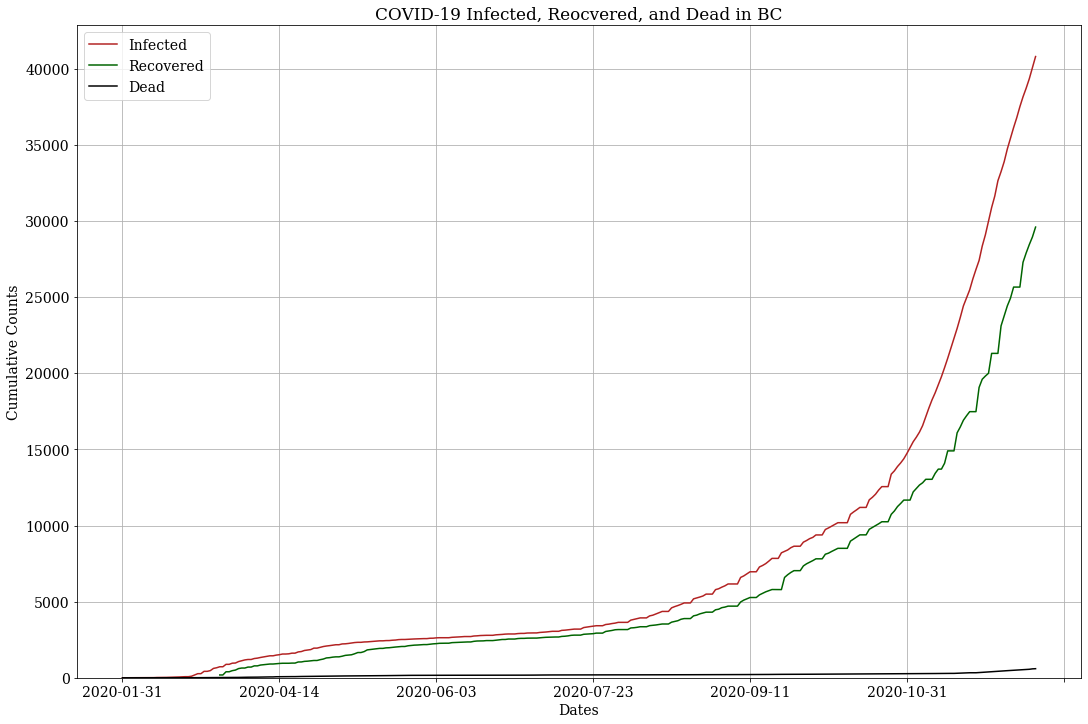

In [171]:
visualization_arr = ["infected", "recovered", "dead"]
colors = ["firebrick", "darkgreen", "black"]
ax = bc_19_date_indexed[visualization_arr].plot(figsize=(18, 12), color=colors)
font = {'font.family' : 'serif',
        'font.size'   : 14,
        'font.weight' : 'normal'}

plt.rcParams.update(font)
plt.title("COVID-19 Infected, Reocvered, and Dead in BC")
plt.xlabel("Dates")
plt.ylabel("Cumulative Counts")
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)

ax.legend(["Infected", "Recovered", "Dead"])

plt.show()

A standard simple SIR model does not take into account the possibility of fatality. Further, an SIR model considers the number of susceptible individuals in a populace as well. 

At this point, we can assume that every person in BC can contract COVID-19. Then, we can use the total population of BC as a starting point for the number of susceptible individuals. Some people are laboring under the delusion that children and young people cannot get COVID. According to the CDC in the US (https://www.cdc.gov/coronavirus/2019-ncov/daily-life-coping/children/symptoms.html), children are typically asymptomatic. This does not mean that they cannot get COVID. This just means that the virus does not manifest itself in the same way that it does in adults or elderly persons. Therefore, it is reasonable to assume that everyone in BC can contract the virus because all age groups are susceptible. As such, we will use the total population of BC as a starting point for the number of susceptible individuals. 

It is important to note that our model is quite ignorant. It does not take into account the interactions between communities. Some of the less dense communities in the interior of BC, for example, have experience 0 COVID cases. Moreover, the majority of the COVID cases in BC are concentrated in Fraser Valley. 

The next assumption we will make is that COVID-19 does not mutate. This assumption is not founded in reality because has mutated frequently since its inception. 

Nonetheless, we will continue with our assumptions and correct any malfeasances present. The graph below illustrates the total number of susceptible, infected, and recovered individuals.

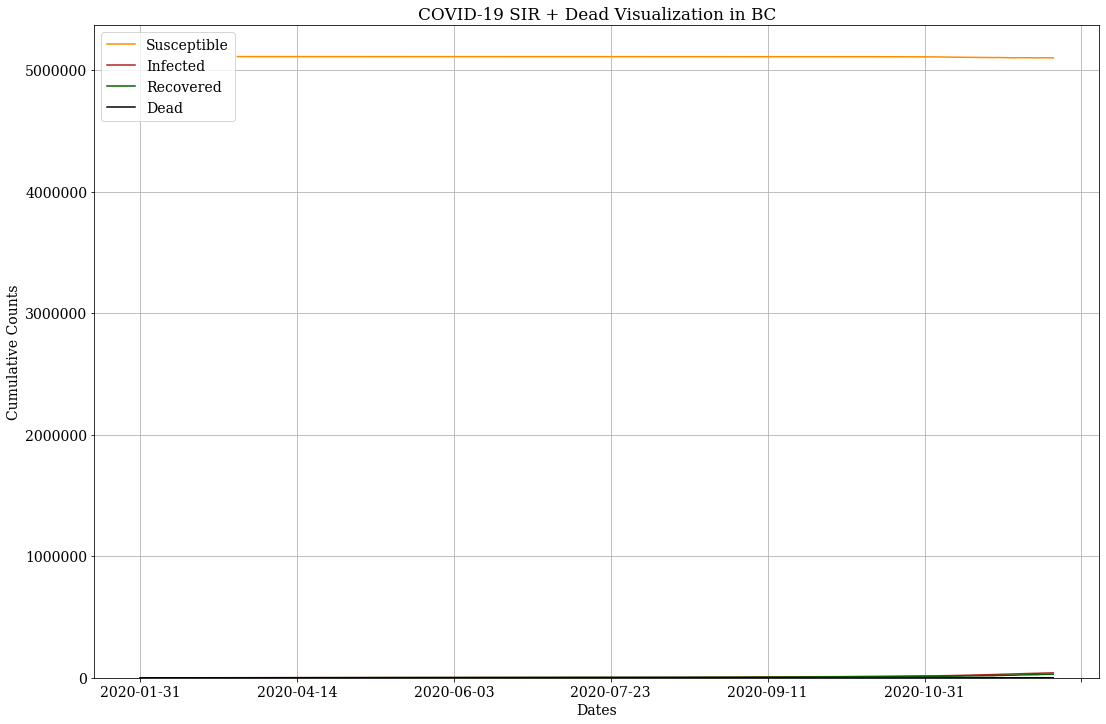

In [206]:
# BC population estimate: https://www2.gov.bc.ca/gov/content/data/statistics/people-population-community/population/population-estimates
susceptible_starting =  5110917

susceptible = np.ones((bc_19.shape[0],))*susceptible_starting

susceptible -= bc_19["infected"] - bc_19["recovered"] - bc_19["dead"]

bc_19["susceptible"] = susceptible
bc_19_date_indexed = bc_19.set_index("date")

visualization_arr = ["susceptible", "infected", "recovered", "dead"]
colors = ["darkorange", "firebrick", "darkgreen", "black"]
ax = bc_19_date_indexed[visualization_arr].plot(figsize=(18, 12), color=colors)
font = {'font.family' : 'serif',
        'font.size'   : 14,
        'font.weight' : 'normal'}

plt.rcParams.update(font)
plt.title("COVID-19 SIR + Dead Visualization in BC")
plt.xlabel("Dates")
plt.ylabel("Cumulative Counts")
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)

ax.legend(["Susceptible", "Infected", "Recovered", "Dead"])

plt.show()

The above visualization puts into perspective the impact of the virus on the population of BC. What follows is an implementation of the SIR model. This implementation is based on the Euler update equations re-stated below:

$s_i = s_{i-1} - b \hspace{0.5mm} s_{i-1} i_{i-1} \cdot \Delta t$  
$i_i = i_{i-1} + (- k i_{i-1} + b \hspace{0.5mm} s_{i-1} i_{i-1}) \cdot \Delta t$  
$r_i = r_{i-1} + k \hspace{0.5mm} i_{i-1} \cdot \Delta t$

In [173]:
def s_update(s_prev, i_prev, b, dt=1):
    return s_prev - b * s_prev * i_prev * dt

def i_update(s_prev, i_prev, k, b, dt=1):
    return i_prev + (-k * i_prev + b * s_prev * i_prev) * dt

def r_update(r_prev, i_prev, k, dt=1):
    return r_prev + k * i_prev * dt


2020-12-11


For initial values, we will use the values starting on June 3rd, 2020, as illustrated in the above Figure.

In [299]:
import datetime

projection_length = 2000

bc_19 = bc_19[["date", "susceptible", "infected", "recovered", "dead"]]

cur_datetime = datetime.date.fromisoformat("2020-12-11") + datetime.timedelta(days=1)

for i in range(projection_length):
    bc_19 = bc_19.append({"date": datetime.date.isoformat(cur_datetime)}, ignore_index=True)
    cur_datetime += datetime.timedelta(days=1)

bc_19_indexed = bc_19.set_index("date")

est_s = np.zeros((bc_19_indexed.shape[0],))
est_i = np.zeros((bc_19_indexed.shape[0],))
est_r = np.zeros((bc_19_indexed.shape[0],))

starting_date = "2020-06-01"
starting_index = bc_19[bc_19["date"] == starting_date].index[0]

est_s[starting_index] = bc_19_indexed["susceptible"][starting_date]
est_s[:starting_index] = bc_19["susceptible"][:starting_index]

est_i[starting_index] = bc_19_indexed["infected"][starting_date]
est_i[:starting_index] = bc_19["infected"][:starting_index]

est_r[starting_index] = bc_19_indexed["recovered"][starting_date] 
est_r[:starting_index] = bc_19["recovered"][:starting_index]


In [300]:
k=35000/susceptible_starting
b=0.0175/susceptible_starting

for i in range(starting_index, est_s.shape[0]):
    est_s[i] = s_update(est_s[i-1], est_i[i-1], b)
    est_i[i] = i_update(est_s[i-1], est_i[i-1], k, b)
    est_r[i] = r_update(est_r[i-1], est_i[i-1], k)

print(bc_19_indexed.shape)
print(est_s.shape)

bc_19_indexed["susceptible_est"] = est_s
bc_19_indexed["infected_est"] = est_i
bc_19_indexed["recovered_est"] = est_r

(2757, 4)
(2757,)


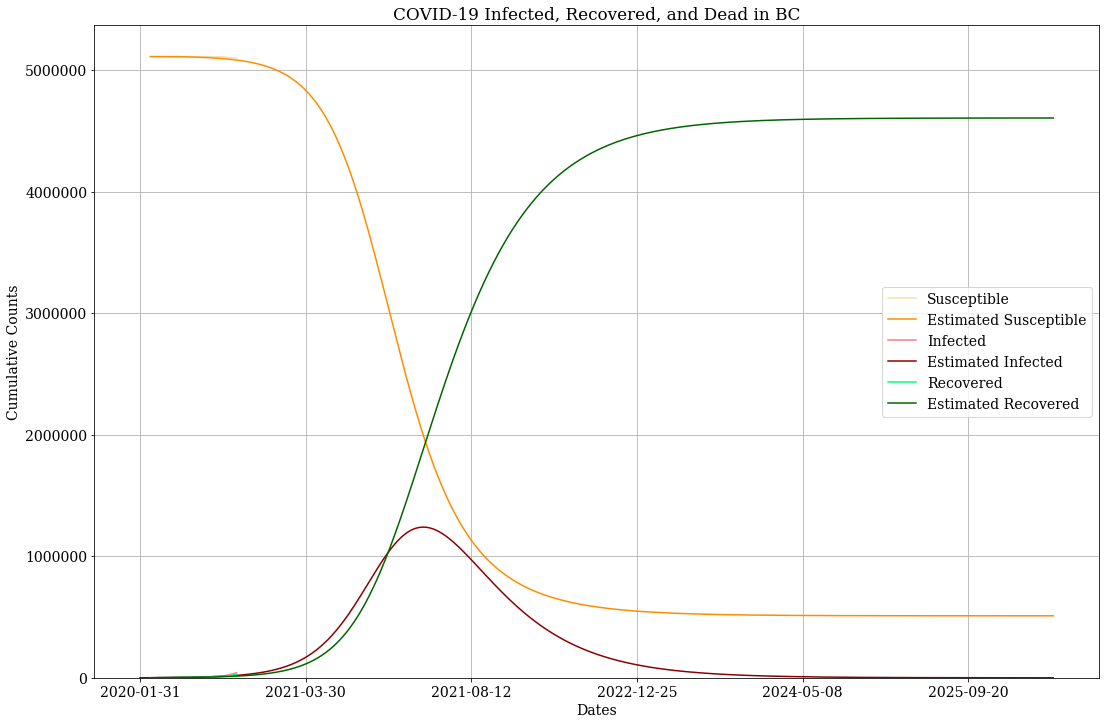

In [303]:
visualization_arr = ["susceptible", "susceptible_est", "infected", "infected_est", "recovered", "recovered_est"]# ["infected", "infected_est", "recovered", "recovered_est"] # 
colors = ["wheat", "darkorange", "lightcoral", "darkred", "springgreen", "darkgreen"]
ax = bc_19_indexed[visualization_arr].plot(figsize=(18, 12), color=colors)
font = {'font.family' : 'serif',
        'font.size'   : 14,
        'font.weight' : 'normal'}

plt.rcParams.update(font)
plt.title("COVID-19 Infected, Recovered, and Dead in BC")
plt.xlabel("Dates")
plt.ylabel("Cumulative Counts")
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)

ax.legend(["Susceptible", "Estimated Susceptible", "Infected", "Estimated Infected", "Recovered", "Estimated Recovered"])# ["Infected", "Estimated Infected", "Recovered", "Estimated Recovered"])

plt.show()